### Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



### The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


### The data set contains the following diseases:

>### Actinic keratosis
>### Basal cell carcinoma
>### Dermatofibroma
>### Melanoma
>### Nevus
>### Pigmented benign keratosis
>### Seborrheic keratosis
>### Squamous cell carcinoma
>### Vascular lesion

# Data Reading/Data Understanding


In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob2 import glob

In [2]:
# mount google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Unzip the dataset
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip" > /dev/null

In [4]:
for dirpath, dirnames, filenames in os.walk("Skin cancer ISIC The International Skin Imaging Collaboration/Train"):
  print(f"There are {len(dirnames)} directories and  {len(filenames)} images in '{dirpath}'. ")

There are 9 directories and  0 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Train'. 
There are 0 directories and  376 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma'. 
There are 0 directories and  139 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion'. 
There are 0 directories and  77 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis'. 
There are 0 directories and  114 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis'. 
There are 0 directories and  438 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma'. 
There are 0 directories and  181 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma'. 
There are 0 directories and  357 images in 'Skin cancer ISIC The International Skin Imagi

In [5]:
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [6]:
train_count = len(list(data_dir_train.glob('*/*.jpg')))
print("Number of Train Images : ", train_count)

test_count = len(list(data_dir_test.glob('*/*.jpg')))
print("Number of Test Images : ", test_count)

Number of Train Images :  2239
Number of Test Images :  118


# Dataset creation

In [7]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123 ,subset="training",validation_split=0.25)

Found 2239 files belonging to 9 classes.
Using 1680 files for training.


In [8]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123 ,subset="validation",validation_split=0.25)

Found 2239 files belonging to 9 classes.
Using 559 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Dataset visualisation

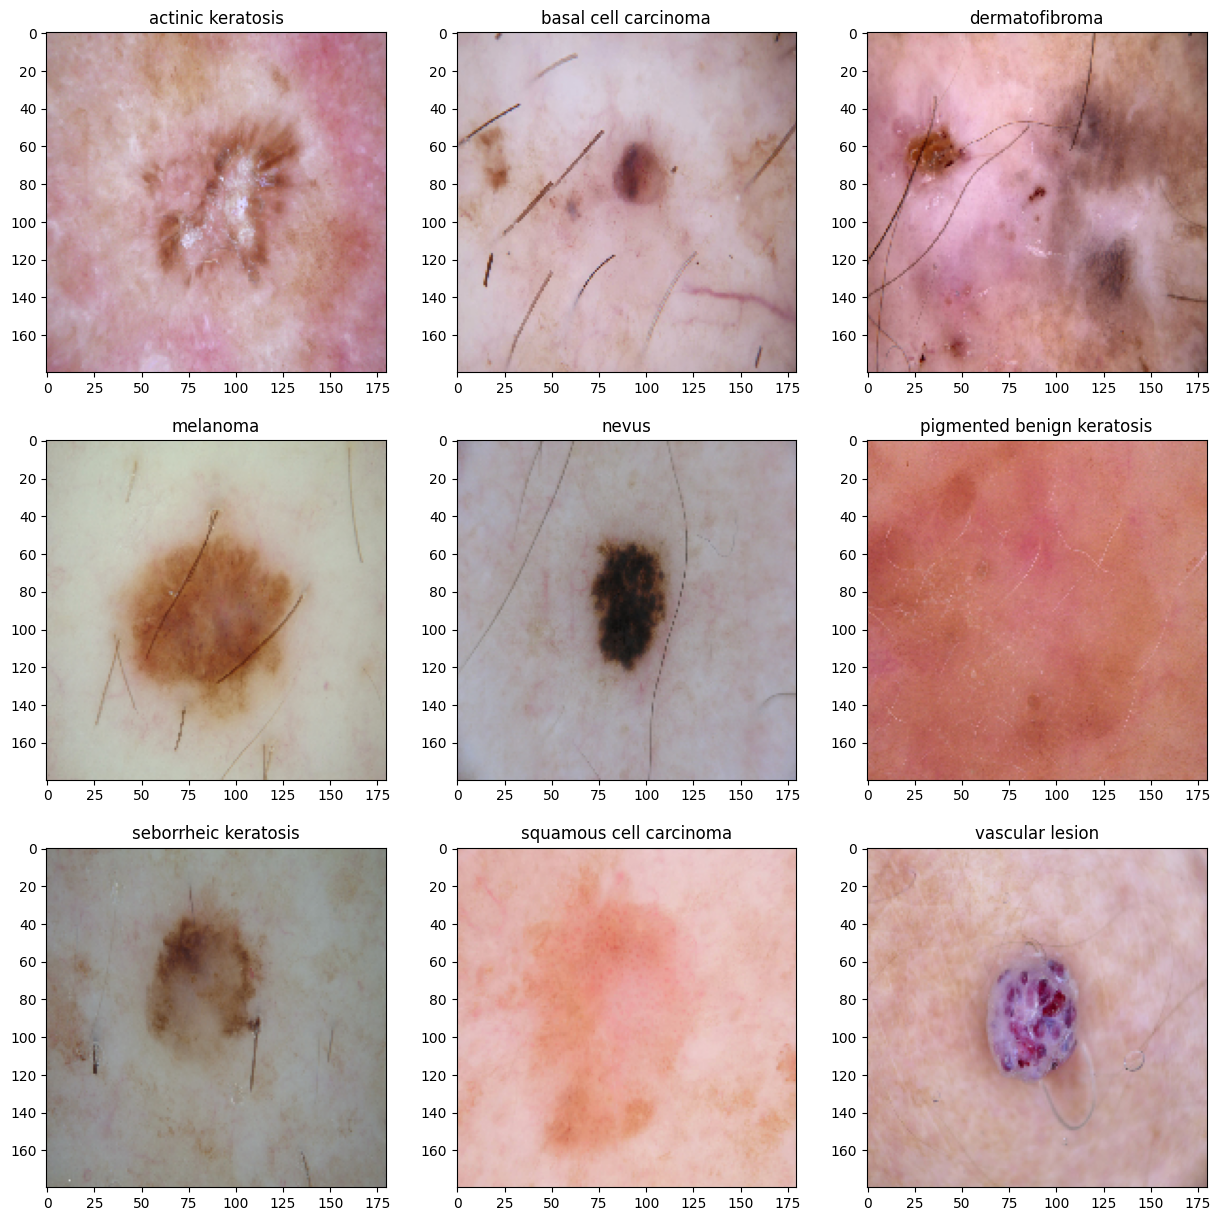

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

files_path = {}

for c in class_names:
    files_path[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c))) 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

# Model Building & training

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
input_shape = (img_height,img_width,3)

model = Sequential()    

# 1st Convulation Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 2nd Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 3d Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   

model.add(layers.Dense(512,activation='relu'))


model.add(layers.Dense(128,activation='relu'))


model.add(layers.Dense(len(class_names),activation='softmax'))

In [13]:
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
53/53 [==============================] - 32s 156ms/step - loss: 1.9757 - accuracy: 0.2911 - val_loss: 1.8621 - val_accuracy: 0.2522
Epoch 2/20
53/53 [==============================] - 2s 40ms/step - loss: 1.6119 - accuracy: 0.4238 - val_loss: 1.4455 - val_accuracy: 0.4919
Epoch 3/20
53/53 [==============================] - 2s 37ms/step - loss: 1.4363 - accuracy: 0.4946 - val_loss: 1.4102 - val_accuracy: 0.5510
Epoch 4/20
53/53 [==============================] - 2s 37ms/step - loss: 1.3631 - accuracy: 0.5262 - val_loss: 1.5197 - val_accuracy: 0.4758
Epoch 5/20
53/53 [==============================] - 2s 36ms/step - loss: 1.3362 - accuracy: 0.5167 - val_loss: 1.3946 - val_accuracy: 0.5224
Epoch 6/20
53/53 [==============================] - 2s 40ms/step - loss: 1.2218 - accuracy: 0.5530 - val_loss: 1.4255 - val_accuracy: 0.5206
Epoch 7/20
53/53 [==============================] - 2s 38ms/step - loss: 1.1837 - accuracy: 0.5804 - val_loss: 1.4357 - val_accuracy: 0.5152
Epoch 8/20


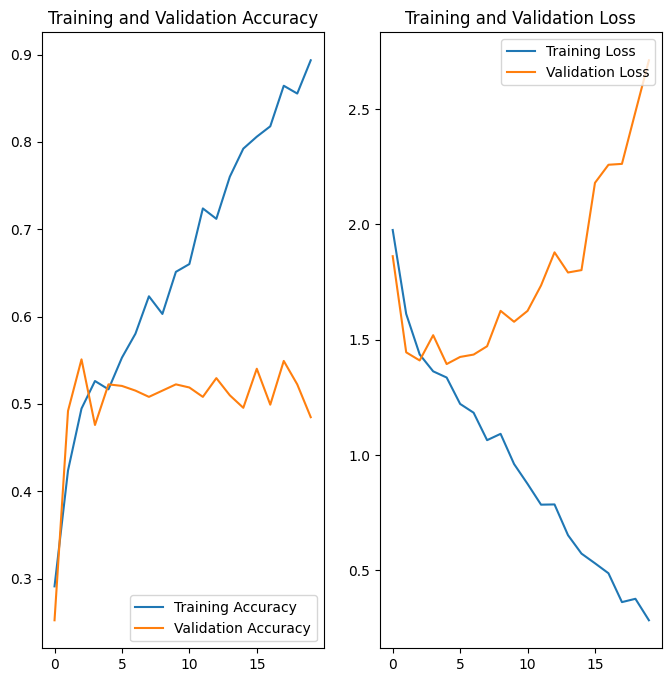

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model is overfitting. From the above Training vs Validation accuracy graph we can see that as the epoch increases the difference between Training accuracy and validation accuracy increases.

# Data augmentation

In [17]:
#Data augumentation strategy. 

rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range  
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    
  #Randomly rotate each image.
  layers.experimental.preprocessing.RandomRotation(0.2),
    
  #Randomly zoom each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),
    
  #Randomly translate each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

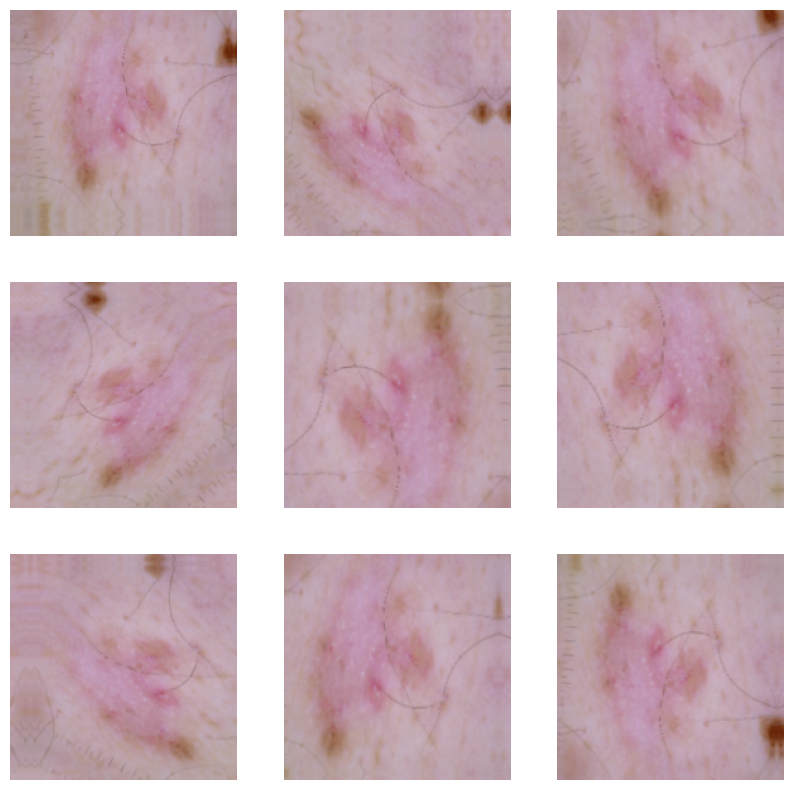

In [18]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")       

# Model Building & training

In [19]:
## Model 2 Creation

#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.


## Your code goes here
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer  

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

In [20]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [21]:
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
53/53 [==============================] - 7s 68ms/step - loss: 2.2549 - accuracy: 0.1875 - val_loss: 2.0469 - val_accuracy: 0.1825
Epoch 2/20
53/53 [==============================] - 3s 62ms/step - loss: 2.0034 - accuracy: 0.2173 - val_loss: 1.9251 - val_accuracy: 0.2952
Epoch 3/20
53/53 [==============================] - 3s 60ms/step - loss: 1.9076 - accuracy: 0.2994 - val_loss: 1.7890 - val_accuracy: 0.4436
Epoch 4/20
53/53 [==============================] - 3s 59ms/step - loss: 1.7374 - accuracy: 0.3738 - val_loss: 1.7198 - val_accuracy: 0.4132
Epoch 5/20
53/53 [==============================] - 3s 61ms/step - loss: 1.6363 - accuracy: 0.4250 - val_loss: 1.5577 - val_accuracy: 0.4848
Epoch 6/20
53/53 [==============================] - 3s 59ms/step - loss: 1.5689 - accuracy: 0.4482 - val_loss: 1.4918 - val_accuracy: 0.5009
Epoch 7/20
53/53 [==============================] - 3s 58ms/step - loss: 1.5682 - accuracy: 0.4536 - val_loss: 1.5167 - val_accuracy: 0.5081
Epoch 8/20
53

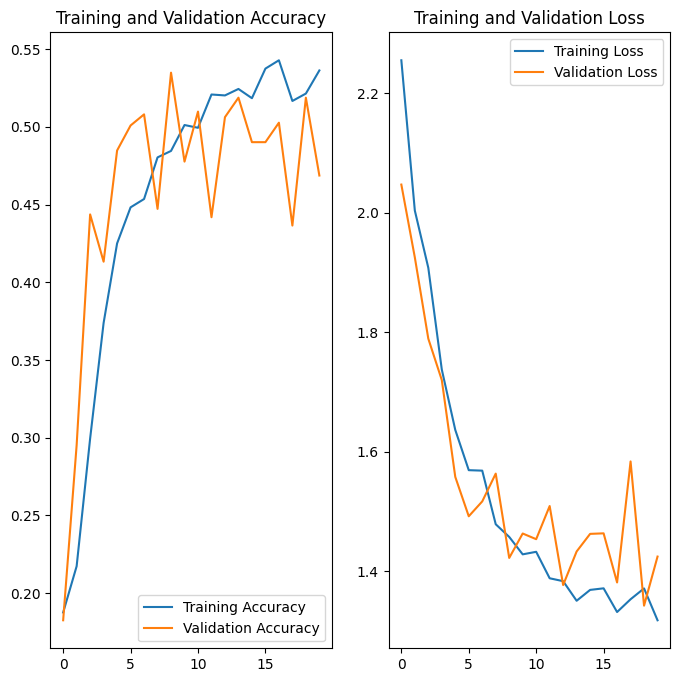

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Class distribution

In [23]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,basal cell carcinoma,376
1,vascular lesion,139
2,seborrheic keratosis,77
3,actinic keratosis,114
4,melanoma,438
5,squamous cell carcinoma,181
6,nevus,357
7,dermatofibroma,95
8,pigmented benign keratosis,462


<Axes: xlabel='No. of Image', ylabel='Class'>

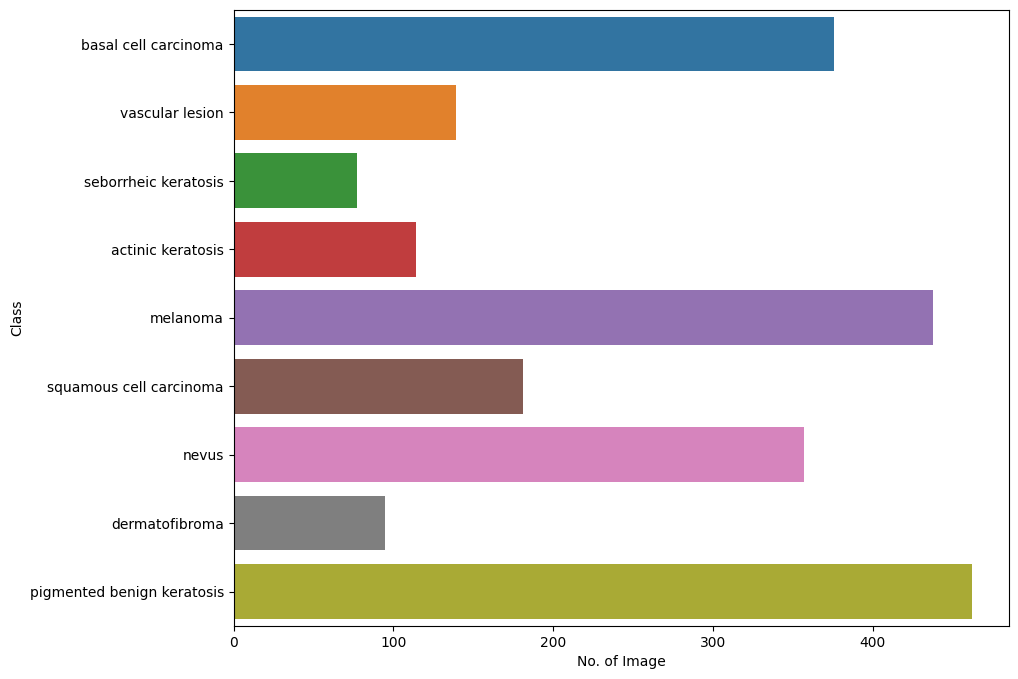

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [25]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Handling class imbalances

In [26]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6169F20A00>: 100%|██████████| 500/500 [00:23<00:00, 21.65 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F61926EC1F0>: 100%|██████████| 500/500 [00:25<00:00, 19.40 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6169EC5340>: 100%|██████████| 500/500 [00:21<00:00, 23.19 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6169F9F220>: 100%|██████████| 500/500 [01:50<00:00,  4.53 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=966x645 at 0x7F6169EE2880>: 100%|██████████| 500/500 [01:31<00:00,  5.49 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6169EB9970>: 100%|██████████| 500/500 [00:20<00:00, 24.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6169EE3340>: 100%|██████████| 500/500 [00:45<00:00, 10.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6169F15190>: 100%|██████████| 500/500 [00:18<00:00, 26.97 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F61B01E4340>: 100%|██████████| 500/500 [00:19<00:00, 25.24 Samples/s]


In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [29]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [30]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [31]:
df2['Label'].value_counts()

basal cell carcinoma          500
vascular lesion               500
seborrheic keratosis          500
actinic keratosis             500
melanoma                      500
squamous cell carcinoma       500
nevus                         500
dermatofibroma                500
pigmented benign keratosis    500
Name: Label, dtype: int64

In [32]:
batch_size = 32
img_height = 180
img_width = 180

In [33]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector 
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Model Building & training

In [35]:
model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization 
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))


In [36]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [37]:
epochs = 50
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/50
169/169 [==============================] - 45s 239ms/step - loss: 2.4242 - accuracy: 0.1821 - val_loss: 1.9563 - val_accuracy: 0.2420
Epoch 2/50
169/169 [==============================] - 28s 163ms/step - loss: 1.8905 - accuracy: 0.2884 - val_loss: 4.0920 - val_accuracy: 0.1463
Epoch 3/50
169/169 [==============================] - 30s 170ms/step - loss: 1.8136 - accuracy: 0.3088 - val_loss: 3.6912 - val_accuracy: 0.1670
Epoch 4/50
169/169 [==============================] - 28s 161ms/step - loss: 1.6605 - accuracy: 0.3570 - val_loss: 1.9411 - val_accuracy: 0.3318
Epoch 5/50
169/169 [==============================] - 28s 161ms/step - loss: 1.5459 - accuracy: 0.4065 - val_loss: 1.5886 - val_accuracy: 0.3638
Epoch 6/50
169/169 [==============================] - 28s 160ms/step - loss: 1.4931 - accuracy: 0.4230 - val_loss: 1.6066 - val_accuracy: 0.3504
Epoch 7/50
169/169 [==============================] - 28s 161ms/step - loss: 1.4783 - accuracy: 0.4325 - val_loss: 1.7118 - val_ac

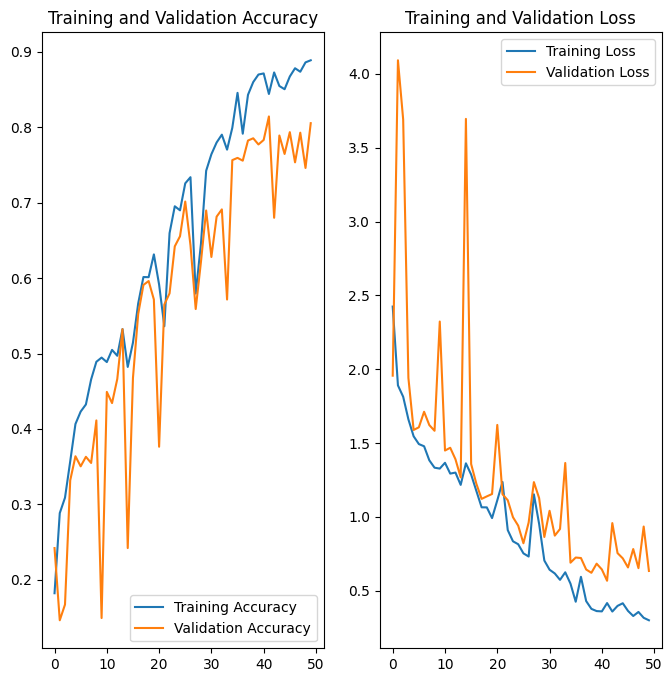

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()